In [72]:
# PROBLEM 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

dataset = pd.read_csv('diabetes.csv')

X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
Y = dataset.iloc[:, 8].values

X, Y[0:10]

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1]))

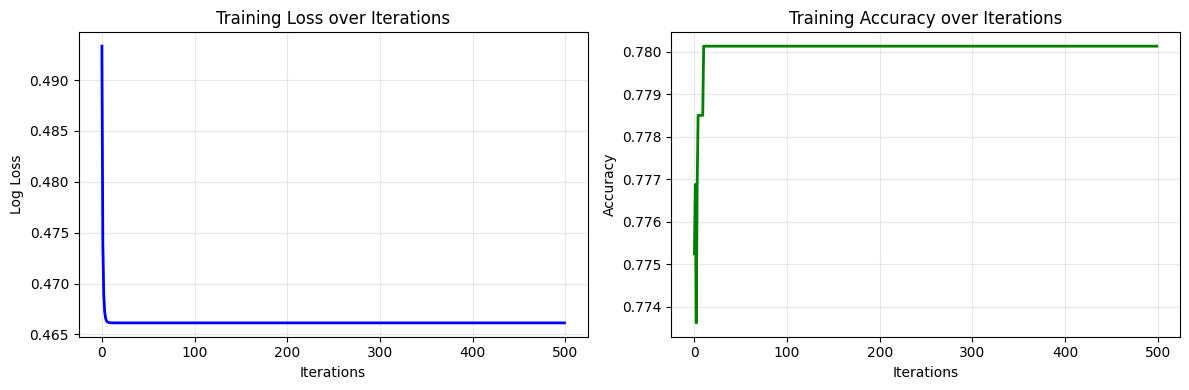

Accuracy:  0.7662
Precision: 0.7805
Recall:    0.5424
F1 Score:  0.6400


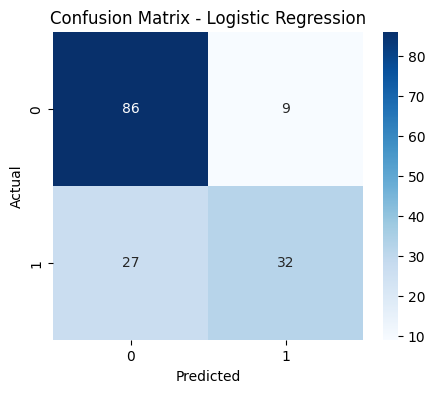

In [73]:
# Train-test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 40)

stdScale_X = StandardScaler()
X_train = stdScale_X.fit_transform(X_train)
X_test = stdScale_X.transform(X_test)

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)

logreg = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, random_state=0, warm_start=True)

train_accuracies, train_losses = [], []

for i in range(500):
    logreg.partial_fit(X_train, Y_train, classes=np.unique(Y_train))
    y_train_pred = logreg.predict(X_train)
    y_train_proba = logreg.predict_proba(X_train)
    train_accuracies.append(accuracy_score(Y_train, y_train_pred))
    train_losses.append(log_loss(Y_train, y_train_proba))

# Plot training metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(train_losses, 'b-', linewidth=2)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Log Loss')
ax1.set_title('Training Loss over Iterations')
ax1.grid(True, alpha=0.3)

ax2.plot(train_accuracies, 'g-', linewidth=2)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy over Iterations')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evaluate
acc = accuracy_score(Y_test, y_pred_logreg)
prec = precision_score(Y_test, y_pred_logreg)
rec = recall_score(Y_test, y_pred_logreg)
f1 = f1_score(Y_test, y_pred_logreg)

# Printing the comparision metrics
print("Accuracy:  {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall:    {:.4f}".format(rec))
print("F1 Score:  {:.4f}".format(f1))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_logreg)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
# PROBLEM 2A

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

X = load_breast_cancer().data
y = load_breast_cancer().target

X.shape, y.shape

((569, 30), (569,))

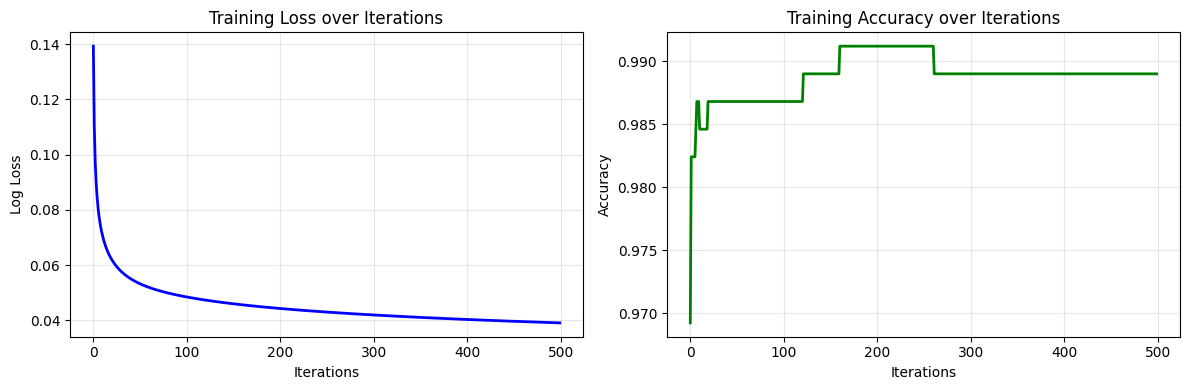

Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9859
F1 Score:  0.9790


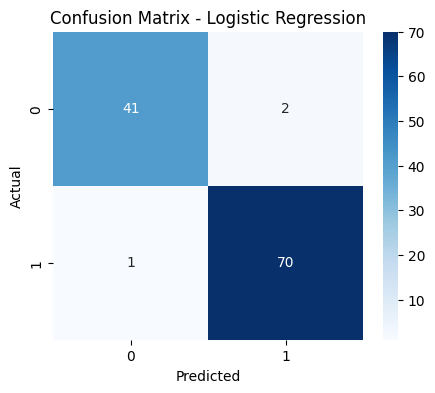

In [75]:
# Train-Test split in 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (Part i)
logreg = LogisticRegression(random_state=42, max_iter=500)  # by default, penalty='l2', C=1.0
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

logreg = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, random_state=0, warm_start=True)

train_accuracies, train_losses = [], []

# Training Loss and Accuracy
for i in range(500):
    logreg.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    y_train_pred = logreg.predict(X_train_scaled)
    y_train_proba = logreg.predict_proba(X_train_scaled)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    train_losses.append(log_loss(y_train, y_train_proba))

# Plot training metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(train_losses, 'b-', linewidth=2)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Log Loss')
ax1.set_title('Training Loss over Iterations')
ax1.grid(True, alpha=0.3)

ax2.plot(train_accuracies, 'g-', linewidth=2)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy over Iterations')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evaluate
acc = accuracy_score(y_test, y_pred_logreg)
prec = precision_score(y_test, y_pred_logreg)
rec = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

# Printing the comparision metrics
print("Accuracy:  {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall:    {:.4f}".format(rec))
print("F1 Score:  {:.4f}".format(f1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C=10
Accuracy:  0.9561
Precision: 0.9853
Recall:    0.9437
F1 Score:  0.9640



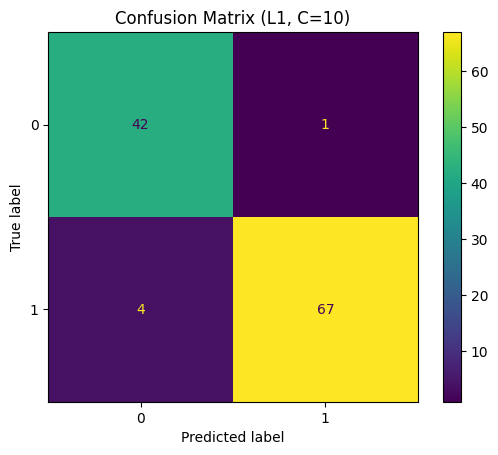

C=1
Accuracy:  0.9737
Precision: 0.9857
Recall:    0.9718
F1 Score:  0.9787



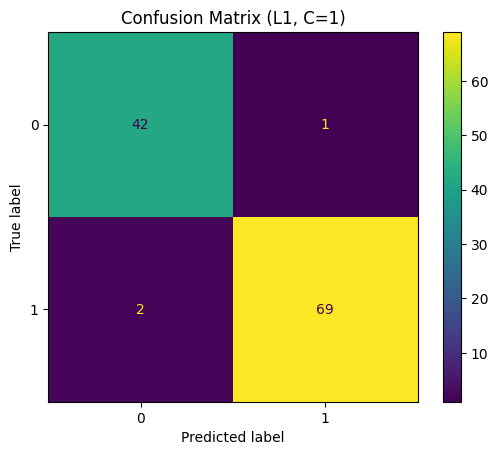

C=0.1
Accuracy:  0.9649
Precision: 0.9718
Recall:    0.9718
F1 Score:  0.9718



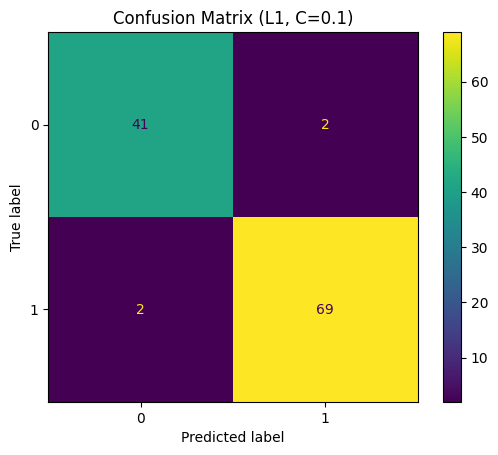

C=0.001
Accuracy:  0.3772
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


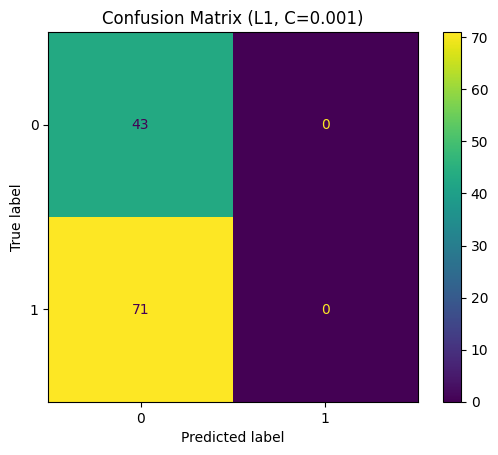

In [76]:
# Part B with Added Penalty

C = [10, 1, 0.1, 0.001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear', random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"C={c}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}\n")

    ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test)
    plt.title(f"Confusion Matrix (L1, C={c})")
    plt.show()